Benefits of Metaflow

1) Data scientists can create argo training pipelines with low effort from the ML code in python.

2) Training pipelines can be tested locally prior to deploying to AIF.

3) The metaflow-argo plugin generates the workflow template for AIF, which saves a lot of manual work especially for multi-step pipelines.

Install libraries


In [ ]:
!python3 -m pip install --upgrade pip
!python3 -m pip install scikit-learn
!python3 -m pip install urllib3
!python3 -m pip install sap-ai-core-metaflow

Copy configuration files & metaflow scripts

In [ ]:
!(if [ ! -d "metaflow-demo" ]; then \
    git clone https://github.com/karimmohraz/metaflow metaflow-demo; \
  fi)
!(if [ ! -d ~/.metaflowconfig ]; then \
    mkdir ~/.metaflowconfig; \
    cp metaflow-demo/config.json ~/.metaflowconfig; \
  fi)
%cd metaflow-demo

Metaflow configuration

Your trainer will provide the S3 credentials

In [11]:
import os
os.environ['METAFLOW_USER'] = 'test'
os.environ['AWS_ACCESS_KEY_ID'] = 'XXXX'
os.environ['AWS_SECRET_ACCESS_KEY'] = 'YYYY'

Visualize hyperparameter training pipeline and run locally

In [ ]:
from IPython.display import Image
!python3 hyperparamtuning.py check
!python3 hyperparamtuning.py output-dot | dot -Tpng -o graph.png
Image('graph.png')

In [ ]:
!python3 hyperparamtuning.py run

Create argo template from metaflow script.

This template is available in the github repo: hyperparameter-demo.json (if you want to execute it).

In [ ]:
!python3 hyperparamtuning.py --with=kubernetes:image=metaflow-docker:1.0.0,secrets=default-object-store-secret argo create --label={"scenarios.ai.sap.com/id":"hyperparamtuning","ai.sap.com/version":"1.0.0"} --annotation={"scenarios.ai.sap.com/name":"metaflow","executables.ai.sap.com/name":"hyperparamtuning"} --image-pull-secret=docker-registry-secret --only-json > hyperparam.json

Create additional argo template for complex training pipeline: 

Simulation of AutoML with crossvalidation.
Implementation in metaflow using a double for loop


Metaflow 2.7.1 executing AutoMLCrossVal for user:test
Visualizing the flow as a GraphViz graph
    Try piping the output to 'dot -Tpng -o graph.png' to produce an actual image.


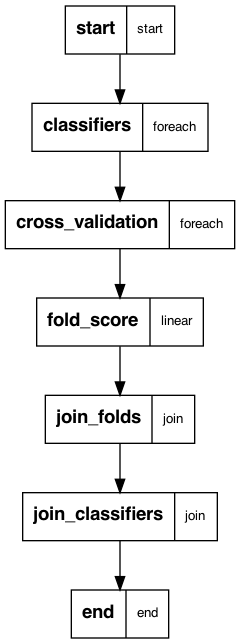

In [17]:
!python3 automl_crossval.py output-dot | dot -Tpng -o graph.png
Image('graph.png')

In [ ]:
!python3 automl_crossval.py --with=kubernetes:image=metaflow-docker:1.0.0,secrets=default-object-store-secret argo create --label={"scenarios.ai.sap.com/id":"automl_crossval","ai.sap.com/version":"1.0.0"} --annotation={"scenarios.ai.sap.com/name":"metaflow","executables.ai.sap.com/name":"automl_crossval"} --image-pull-secret=docker-registry-secret --only-json > automl_crossval.json

Metaflow 2.3.0 executing AutoMLCrossVal for user:test
Validating your flow...
    The graph looks good!
Running pylint...
    Pylint is happy!
Deploying automlcrossval to Argo Workflow Templates...


Next steps:
- from the left sidebar choose "Files" (folder icon) and click on Refresh
- download the json file
- push json file to AIF github repo